d:\work\python\forecast\.venv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


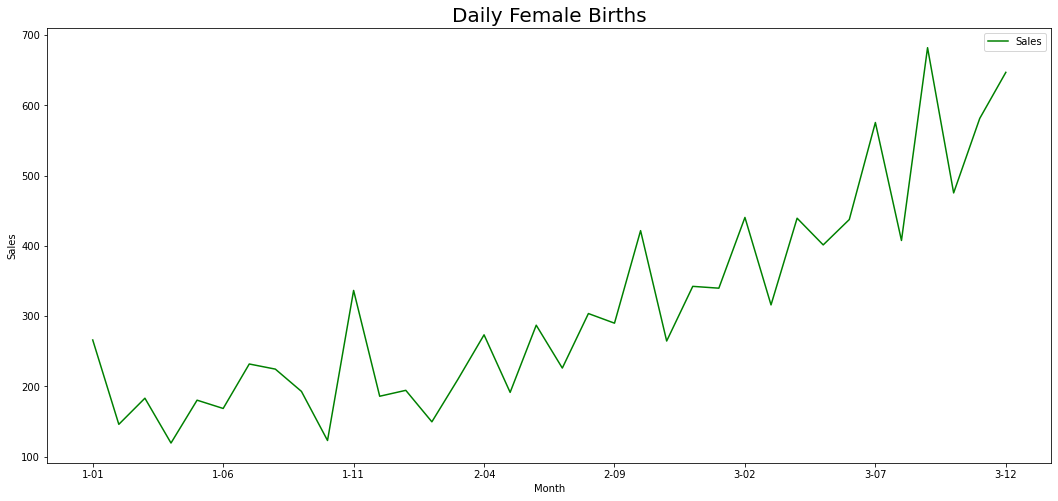

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime

# nama file csv
file_csv = 'daily-total-female-births.csv'
# nama kolom untuk index (Month)
index_name = 'Date'
# nama kolom untuk data (Sales)
data_name = 'Births'

df = pd.read_csv(file_csv, header=0, index_col=index_name)

def show_plot(df, title, color):
    df.plot(color=color, figsize=(18,8))
    plt.title(title, fontsize=20)
    plt.xlabel('Date')
    plt.ylabel('Births')

show_plot(df, 'Daily Female Births', 'green')
plt.show()

# 0. Membagi data train & test

jml_total: 36
jml_train: 36
jml_test:36


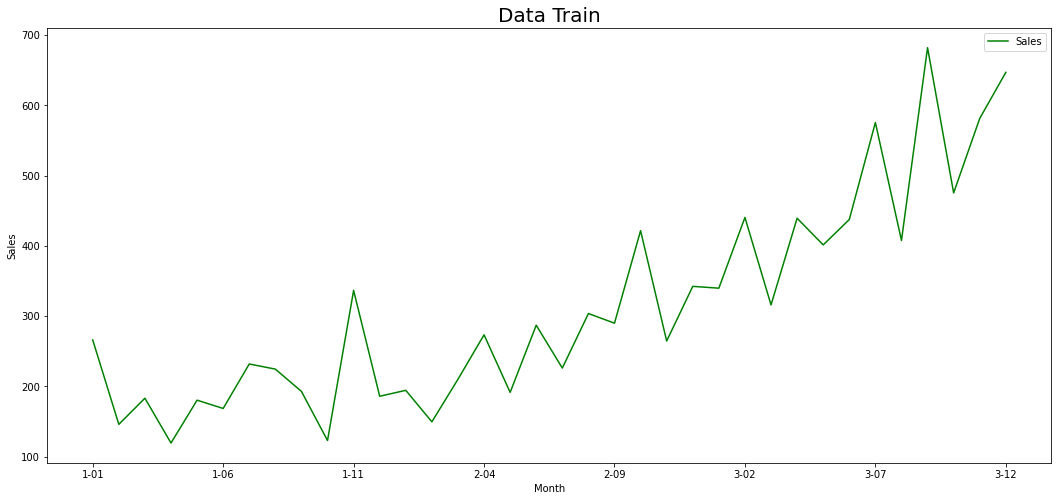

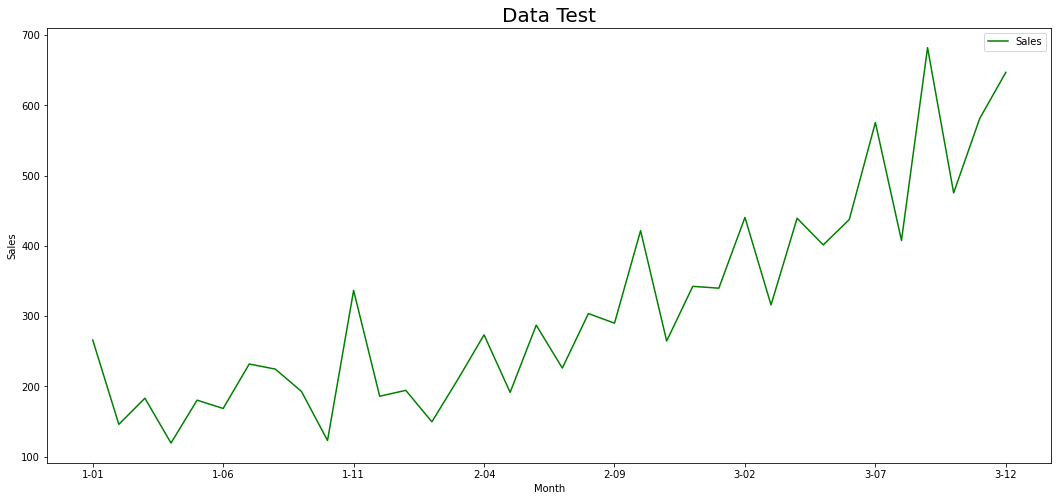

In [76]:
# dalam bentuk desimal, 0.8 = 80%
ratio = 0.9
jml_train = round(ratio * len(df))

df_train = df
df_test = df

print('jml_total: '+ str(len(df)))
print('jml_train: '+ str(len(df_train)))
print('jml_test:'+ str(len(df_test)))

show_plot(df_train, 'Data Train', 'green')
plt.show()

show_plot(df_test, 'Data Test', 'green')
plt.show()

# 1. Identifikasi Model

1. Cek langsung dengan melihat arah plot/grafik, apakah stasioner atau tidak
2. Menggunakan Moving Average

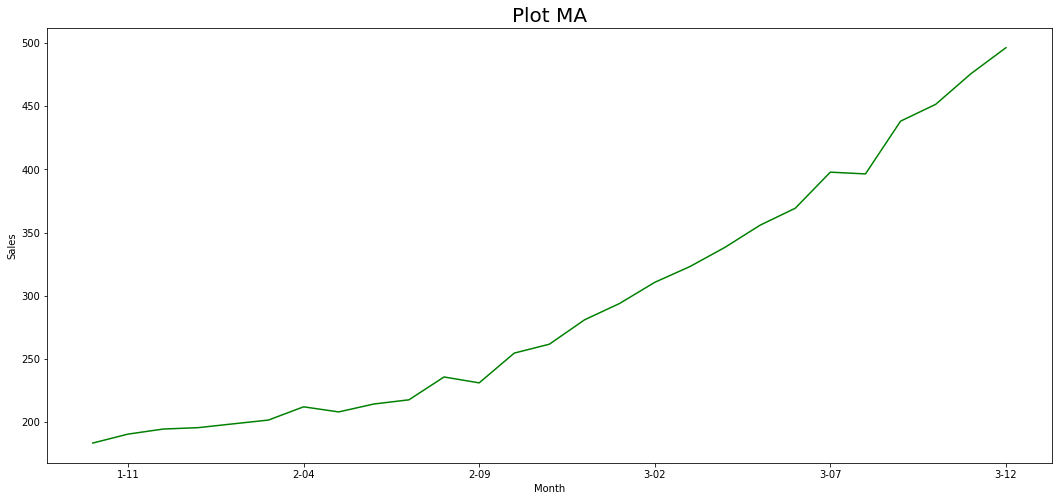

In [77]:
df_ma = df_train[data_name].rolling(window=10).mean()
show_plot(df_ma, 'Plot MA', 'green')
plt.show()

# 2. Estimasi Parameter

a. Parameter q (ACF - Autocorrelation Function)

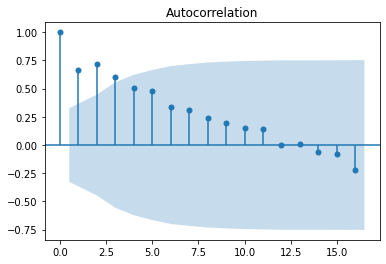

In [78]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_train)
plt.show()

# births
# q = [0,1,2,7,8,21]

# shampoo
# q = [0,1,2,3]

b. Parameter p (PACF - Partical Autocorrelation Function)

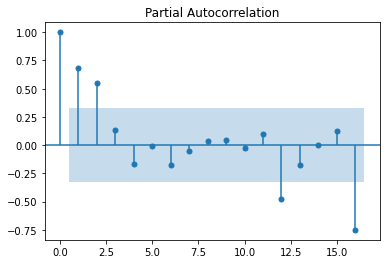

In [79]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_test)
plt.show()

# births
# p = [0,1,7,8,21]

# shampoo
# p = [0,1,2,16]

c. Parameter d (diferensiasi)

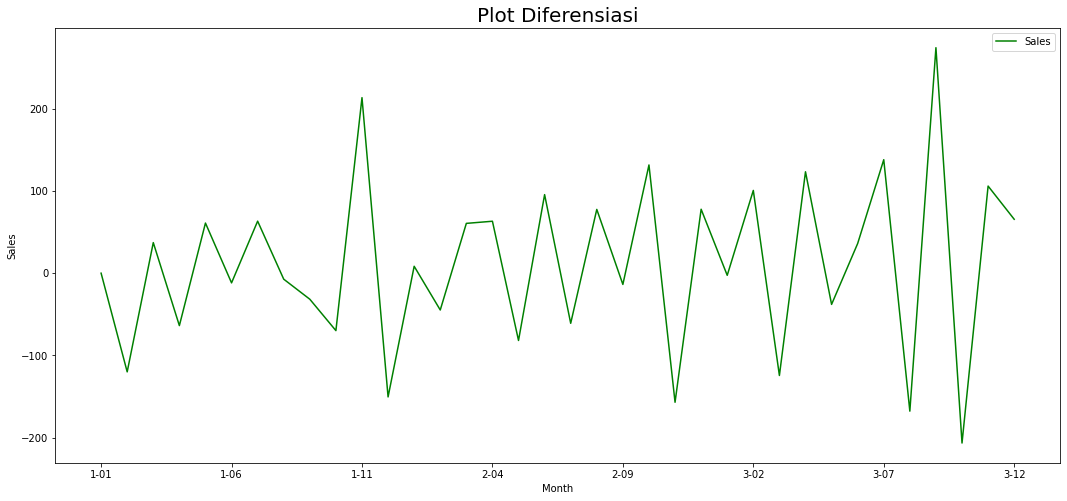

In [80]:
df_madiff = df_train.diff().fillna(0)
show_plot(df_madiff, 'Plot Diferensiasi', 'green')
plt.show()

# d = 1

# 3. Pemilihan model terbaik

In [89]:
from statsmodels.tsa.arima_model import ARIMA

# births
# p = [0,1,7,8,21]
# q = [0,1,2,7,8,21]

# shampoo
# p = [0,1,2,16]
# q = [0,1,2,3]
p = 16
d = 1
q = 3

model = ARIMA(df_train, order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

model_fit.plot_predict(dynamic=False)
plt.show()

# hasil kombinasi births
# (7,1,1)
# (1,1,2)


# hasil kombinasi shampoo
# (1,1,1)

d:\work\python\forecast\.venv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
d:\work\python\forecast\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored wh

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

# 4. Test model & hitung error

d:\work\python\forecast\.venv\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
d:\work\python\forecast\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored wh

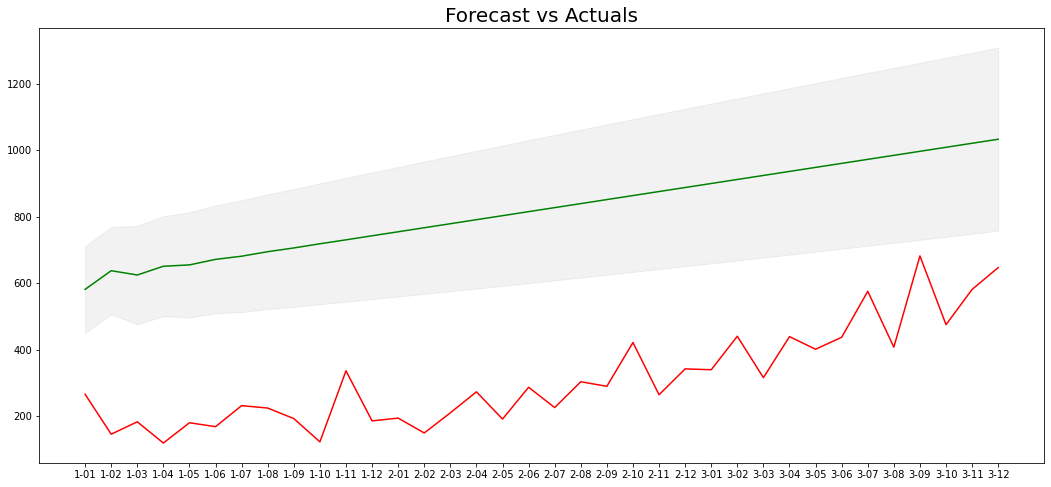

MAPE: 2.057942268840422


In [90]:
from sklearn.metrics import mean_absolute_percentage_error as mape

# hasil kombinasi births
# (7,1,1)
# (1,1,2)

# hasil kombinasi shampoo
# (1,1,1)

# MAPE => 18.29
# p, d, q = (1, 1, 2)

# MAPE => 17.80
# p, d, q = (7, 1, 1)

# MAPE => 205.8
p, d, q = (1, 1, 1)

model = ARIMA(df_train, order=(p,d,q))
model_fit = model.fit()

# forecast
forecast, se, conf = model_fit.forecast(len(df_test), alpha=0.05)
                                        
df_test['Forecast'] = pd.Series(forecast, index=df_test.index)
lower_series = pd.Series(conf[:, 0], index=df_test.index)
upper_series = pd.Series(conf[:, 1], index=df_test.index)

plt.figure(figsize=(18,8))
plt.plot(df_test[data_name], label='actual', color='red')
plt.plot(df_test['Forecast'], label='forecast', color='green')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.05)
plt.title('Forecast vs Actuals', fontsize=20)
plt.show()

n_mape = mape(df_test[data_name], df_test['Forecast'])
print('MAPE: '+ str(n_mape))

In [55]:
print(df_test)

            Births   Forecast
Date                         
1959-10-20      42  48.522220
1959-10-21      38  46.548550
1959-10-22      47  46.643397
1959-10-23      38  47.861404
1959-10-24      36  47.706858
...            ...        ...
1959-12-27      37  49.397757
1959-12-28      52  49.429282
1959-12-29      48  49.460808
1959-12-30      55  49.492334
1959-12-31      50  49.523859

[73 rows x 2 columns]
